<a href="https://colab.research.google.com/github/kebscharry/cherrie/blob/main/Image_classification_in_fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Processing

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

Load the fashion MNIST dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


Normalize the image data to range between 0 and 1

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

Reshape the data to fit the model input requirements

In [ ]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

Convert the labels into one-hot vectors

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## **Model Development**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Designing a CNN

In [ ]:
model = Sequential([
    Conv2D(32,(3,3), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

## **Model Training**

Compiling the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model on the training data

In [ ]:
history=model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 44s 58ms/step - loss: 0.1515 - accuracy: 0.9447 - val_loss: 0.2663 - val_accuracy: 0.9080
Epoch 2/10
750/750 [==============================] - 43s 57ms/step - loss: 0.1387 - accuracy: 0.9484 - val_loss: 0.2849 - val_accuracy: 0.9076
Epoch 3/10
750/750 [==============================] - 46s 61ms/step - loss: 0.1256 - accuracy: 0.9536 - val_loss: 0.2856 - val_accuracy: 0.9048
Epoch 4/10
750/750 [==============================] - 46s 61ms/step - loss: 0.1153 - accuracy: 0.9560 - val_loss: 0.2900 - val_accuracy: 0.9058
Epoch 5/10
750/750 [==============================] - 44s 59ms/step - loss: 0.1066 - accuracy: 0.9603 - val_loss: 0.3369 - val_accuracy: 0.8982
Epoch 6/10
750/750 [==============================] - 45s 60ms/step - loss: 0.0982 - accuracy: 0.9643 - val_loss: 0.3401 - val_accuracy: 0.9047
Epoch 7/10
750/750 [==============================] - 47s 63ms/step - loss: 0.0905 - accuracy: 0.9669 - val_loss: 0.3165 - val_accuracy:

## **Evaluation and analysis**

In [ ]:
import matplotlib.pyplot as plt

Evaluate the models performance on the test dataset

In [ ]:
test_loss, test_accuracy=model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 10ms/step - loss: 0.4124 - accuracy: 0.9068


Plot the training and validation accuracy and loss over epochs

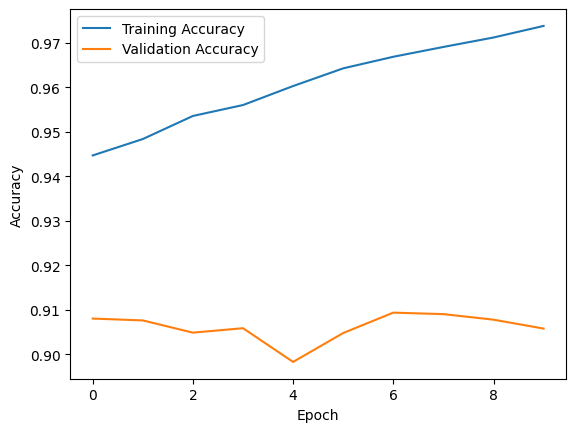

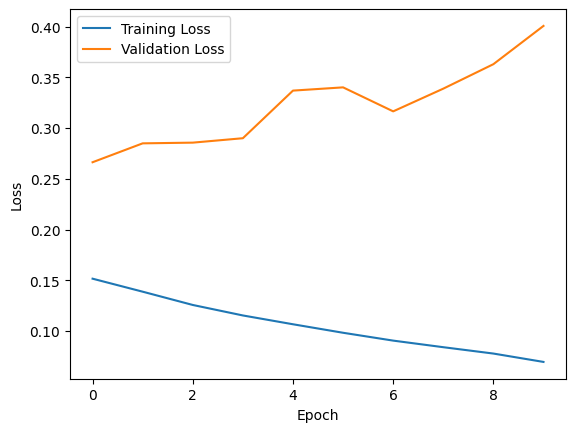

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



Display sample images with their predicted and actual labels

313/313 [==============================] - 4s 12ms/step


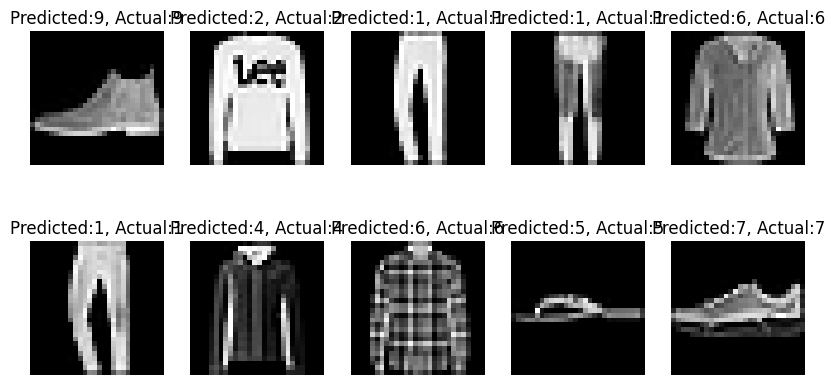

In [ ]:
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1)
actual_labels = tf.argmax(test_labels, axis=1)

sample_images=test_images[:10]
sample_predicted_labels=predicted_labels[:10]
sample_actual_labels=actual_labels[:10]

plt.figure(figsize=(10,5))
for i in range(10):
  plt.subplot(2,5, i+1)
  plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
  plt.title(f"Predicted:{sample_predicted_labels[i]}, Actual:{sample_actual_labels[i]}")
  plt.axis('off')

plt.show()